In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt

### **Reading the datset and setting the name of columns with data.columns**

In [4]:
data=pd.read_csv('/content/dataset/startup_funding.csv')
data.columns=['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks']

In [5]:
#Lets look the shape of dataset
data.shape

(3044, 10)

In [ ]:
#Now, Lets have a view at top two rows of dataset
data.head(2)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN


## **Removing inconsistency**


In [6]:
data['StartupName'] = data['StartupName'].apply(lambda x: (str(x).replace("\\\\","")))
data['StartupName'] = data['StartupName'].apply(lambda x: (str(x).replace("\"","")))

In [7]:
for i in range(0,len(data["IndustryVertical"])):
    if data["IndustryVertical"][i] in ["ECommerce",
                                       "ecommerce",
                                       "Ecommerce",
                                       "E-Commerce",
                                       "E-commerce"]:
        data["IndustryVertical"][i]="eCommerce"

for i in range(0,len(data["StartupName"])):
    if data["StartupName"][i] in ["Ola",
                                  "Ola Cabs",
                                  "Olacabs"]:
        data["StartupName"][i]="Ola"
    elif data["StartupName"][i] =="Flipkart.com":
        data["StartupName"][i]="Flipkart"
    elif data["StartupName"][i] =="Paytm Marketplace":
        data["StartupName"][i]="Paytm"
for i in range(0,len(data["StartupName"])):
  if data["InvestorsName"][i] in ['Undisclosed investors',
                                  'Undisclosed Investors',
                                  'Undisclosed',
                                  'Undisclosed investor',
                                  'Undisclosed Investor',
                                  'undisclosed investors']:
    data["InvestorsName"][i]="Undisclosed"

for i in range(0,len(data["StartupName"])):
    if data["StartupName"][i] in ["OYO",
                                  "OYO Rooms",
                                  "OyoRooms",
                                  "Oyorooms",
                                  "Oyo",
                                 "Oyo Rooms"]:
        data["StartupName"][i]= "OYO Rooms"
    elif data["StartupName"][i] in ["Byjuxe2x80x99s",
                                    "BYJU'S"]:
        data["StartupName"][i]= "Byju's"

for i in range  (0,len(data["CityLocation"])):
    if data["CityLocation"][i] in ["New Delhi",
                                   "Delhi",
                                   "Noida",
                                   "Gurugram",
                                   "Gurgaon"]:
        data["CityLocation"][i]="NCR"
    elif data["CityLocation"][i]=="Bangalore":
        data["CityLocation"][i]="Bengaluru"

data.loc[data['CityLocation'].isin(['\\\\xc2\\\\xa0Noida', '\\xc2\\xa0Noida']), 'CityLocation'] = 'Noida'
data.loc[data['CityLocation'].isin(['\\\\xc2\\\\xa0Bangalore', '\\xc2\\xa0Bangalore', 'Bangalore']), 'CityLocation'] = 'Bengaluru'
data.loc[data['CityLocation'].isin(['\\\\xc2\\\\xa0New Delhi', '\\xc2\\xa0New Delhi']), 'CityLocation'] = 'New Delhi'
data.loc[data['CityLocation'].isin(['\\\\xc2\\\\xa0Gurgaon', 'Gurugram']), 'CityLocation'] = 'Gurgaon'
data.loc[data['CityLocation'].isin(['\\\\xc2\\\\xa0Mumbai', '\\xc2\\xa0Mumbai']), 'CityLocation'] = 'Mumbai'


data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0News Aggregator mobile app", 'IndustryVertical'] = 'News Aggregator mobile app'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Online Jewellery Store", 'IndustryVertical'] = 'Online Jewellery Store'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Fashion Info Aggregator App", 'IndustryVertical'] = 'Fashion Info Aggregator App'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Online Study Notes Marketplace", 'IndustryVertical'] = 'Online Study Notes Marketplace'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Warranty Programs Service Administration", 'IndustryVertical'] = 'Warranty Programs Service Administration'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Pre-School Chain", 'IndustryVertical'] = 'Pre-School Chain'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Premium Loyalty Rewards Point Management", 'IndustryVertical'] = 'Premium Loyalty Rewards Point Management'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Contact Center Software Platform", 'IndustryVertical'] = 'Contact Center Software Platform'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Casual Dining restaurant Chain", 'IndustryVertical'] = 'Casual Dining restaurant Chain'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Online Grocery Delivery", 'IndustryVertical'] = 'Online Grocery Delivery'
data.loc[data['IndustryVertical'] == "Online home d\\\\xc3\\\\xa9cor marketplace", 'IndustryVertical'] = 'Online home decor marketplace'
data.loc[data['IndustryVertical'].isin(["Fin-Tech"]), 'IndustryVertical'] = 'FinTech'

data.loc[data['InvestorsName'].isin(['Undisclosed investors', 'Undisclosed', 'undisclosed investors', 'Undisclosed Investor', 'Undisclosed investors']), 'InvestorsName'] = 'Undisclosed Investors'
data.loc[data['InvestorsName'] == "\\\\xc2\\\\xa0Tiger Global", 'InvestorsName'] = 'Tiger Global'
data.loc[data['InvestorsName'] == "\\\\xc2\\\\xa0IndianIdeas.com", 'InvestorsName'] = 'IndianIdeas'
data.loc[data['InvestorsName'] == "\\\\xc2\\\\xa0IvyCap Ventures, Accel Partners, Dragoneer Investment Group", 'InvestorsName'] = 'IvyCap Ventures, Accel Partners, Dragoneer Investment Group'
data.loc[data['InvestorsName'] == "\\\\xc2\\\\xa0Goldman Sachs", 'InvestorsName'] = 'Goldman Sachs'

#Recent cleaning code is taken from  from jagannathrk notebook.

In [8]:
# Lets see percentage of missing values in every column
m=(100-(data.count()/data.isna().count())*100)
display(m)

SNo                  0.000000
Date                 0.000000
StartupName          0.000000
IndustryVertical     5.617608
SubVertical         30.749014
CityLocation         5.913272
InvestorsName        0.788436
InvestmentType       0.131406
AmountInUSD         31.537451
Remarks             86.235217
dtype: float64

In [9]:
# As we can see, Remarks column has the 86.235217% missing value, so we will drop it.
data.drop("Remarks", axis=1, inplace=True)

## **Exploring IndustryVertical (Industry they belong)**

In [10]:
IV=data.IndustryVertical
data.IndustryVertical.nunique()

815

#### There are total 815 unique industry vertical, but here we will focus on top 10

In [11]:
label10=np.arange(0,10)
top=data["IndustryVertical"].value_counts().head(10)
fig=go.Figure(data=[go.Bar(y=top.values,x=top.index, marker={'color':label10})])
fig.update_layout(autosize=True ,plot_bgcolor='rgb(275, 275, 275)')
fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black"
fig

## Lets explore the amount of Funding startups received

In [13]:
display(data["AmountInUSD"][0])
display(data["AmountInUSD"][0]*2)

'20,00,00,000'

'20,00,00,00020,00,00,000'

In [ ]:
# As we can, column's values are working as String.

In [14]:
import re

data.drop([2602,2603,2604,2605,2606,2607,2608,2609,2610,2611], inplace = True)
data.reset_index(drop=True, inplace=True)

for i in range (0, len(data["AmountInUSD"])):
    data["AmountInUSD"][i]=re.sub('\D',"",str(data["AmountInUSD"][i]))
data["AmountInUSD"]=pd.to_numeric(data["AmountInUSD"])

for i in range (0, len(data["StartupName"])):
    data["StartupName"][i]=re.sub('xc2xa0',"",str(data["StartupName"][i]))

In [15]:
temp=data[["StartupName","AmountInUSD"]].groupby("StartupName").sum().sort_values(by="AmountInUSD", ascending=False)
top=temp.head(10)
print(top)

                   AmountInUSD
StartupName                   
Flipkart          4.759700e+09
Rapido Bike Taxi  3.900000e+09
Paytm             3.348950e+09
Ola               2.054200e+09
Pratilipi         1.515250e+09
OYO Rooms         9.970000e+08
Udaan             8.700000e+08
Snapdeal          7.000000e+08
True North        6.000000e+08
BigBasket         5.070000e+08


In [16]:
data["AmountInUSD"][data["StartupName"]=="Rapido Bike Taxi"]=data["AmountInUSD"]/71.19
temp=data[["StartupName","AmountInUSD"]].groupby("StartupName").sum().sort_values(by="AmountInUSD", ascending=False)
top=temp.head(10)
print(top)

              AmountInUSD
StartupName              
Flipkart     4.759700e+09
Paytm        3.348950e+09
Ola          2.054200e+09
Pratilipi    1.515250e+09
OYO Rooms    9.970000e+08
Udaan        8.700000e+08
Snapdeal     7.000000e+08
True North   6.000000e+08
BigBasket    5.070000e+08
FabHotels    4.969976e+08


In [17]:
label10=np.arange(0,10)
fig=go.Figure(data=[go.Bar(y=top.AmountInUSD,x=top.index, marker={'color':label10})])
fig.update_layout(autosize=True ,plot_bgcolor='rgb(275, 275, 275)')
fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black"
fig.show()

## **Lets see the Pie-chart for top 7 different types of Funding**

In [18]:
data['InvestmentType'] = data['InvestmentType'].apply(lambda x: (str(x).replace("\\\\n"," ")))

for i in range(0, len(data["InvestmentType"])):
    if data["InvestmentType"][i] in ["Seed/ Angel Funding","Seed / Angel Funding","Seed/Angel Funding",
                                       "Seed / Angle Funding", "Angel / Seed Funding"]:
        data["InvestmentType"][i]="Seed Angel Funding"



typ=data["InvestmentType"].value_counts().head(7)


In [19]:
colrs = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig=go.Figure(data=[go.Pie(labels=typ.index,values=typ.values)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=10,
                  marker=dict(colors=colrs))
fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black"
fig.update_layout(height=600,autosize=True ,plot_bgcolor='rgb(275, 275, 275)')
fig.show()

## **Top 10 Investors**

In [20]:
i=data['InvestorsName'].value_counts().head(11).reset_index()
i.columns=["InvestorsName", "Number"]
i.head(2)

,InvestorsName,Number
0,Undisclosed Investors,112
1,Ratan Tata,25


In [21]:
# We will remove Undisclosed row
i.drop(0,axis=0,inplace=True)

In [22]:
fig=go.Figure(data=[go.Scatter(x=i.InvestorsName,y=i.Number,mode='markers',marker_size=(i.Number)*3,  marker={'color':label10})])
fig.update_layout(autosize=True ,plot_bgcolor='rgb(275, 275, 275)')
fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black"
fig.show()

## **Top 10 Cities with Highest number of Startups**

In [23]:
cities=data["CityLocation"].value_counts().head(10).reset_index()
cities.columns=["City","Number"]
fig=go.Figure(data=[go.Scatter(x=cities.City,y=cities.Number,mode='markers',marker_size=(cities.Number)/6,  marker={'color':label10})])
fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black"
fig.update_layout(autosize=True,plot_bgcolor='rgb(275, 275, 275)')
fig.show()

## **most common words in SubVertical using WordCloud**

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [25]:
text=[]
for i in range (0, len(data["SubVertical"])):
  if type(data["SubVertical"][i])==str:
    text.append(data["SubVertical"][i])

text=" ".join(text)
text = text.split(" ")
# text=set(text)
text=" ".join(text)

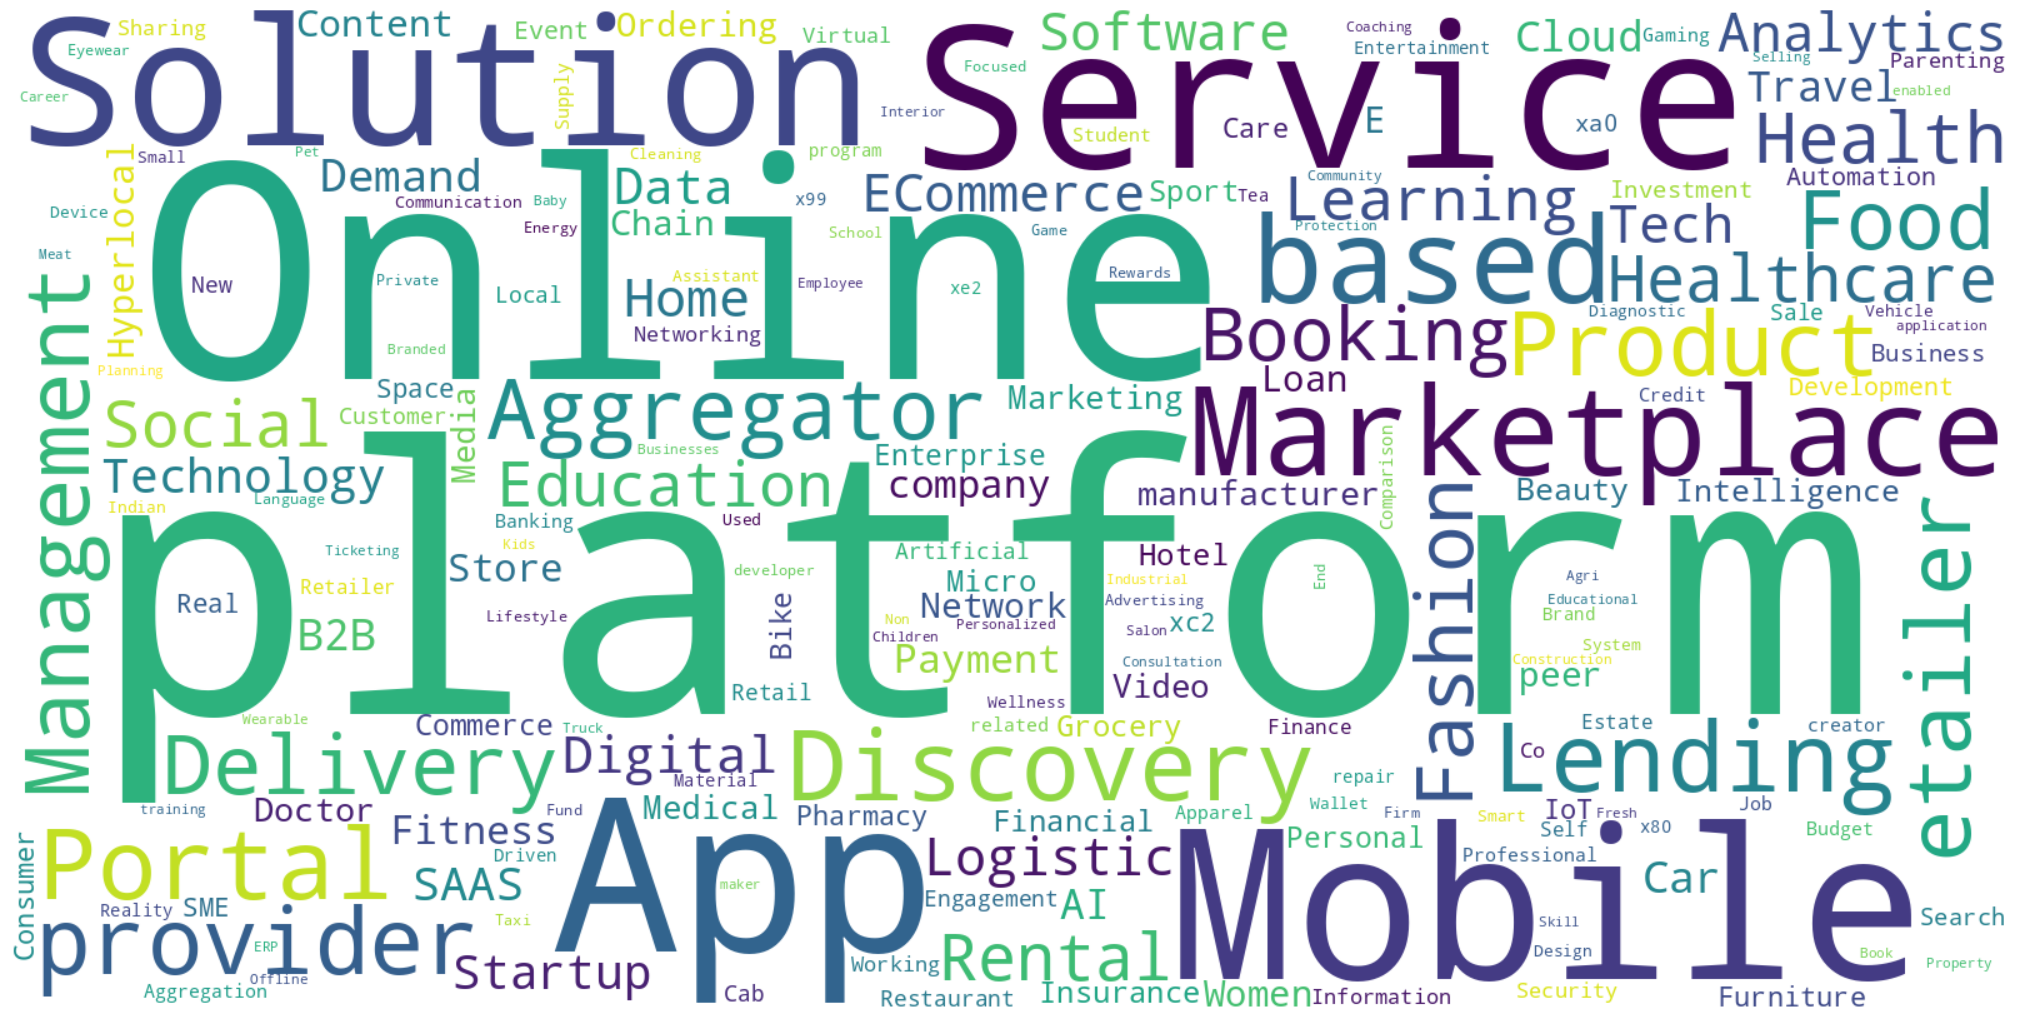

In [26]:
wordcloud = WordCloud( max_words=200, background_color="white",collocations=False, width=1600, height=800).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()